# Problem Statement

# Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

sns.set()
sns.set_style('darkgrid')


pd.options.display.max_columns = None
pd.options.display.max_rows = 50
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.width = 2000

# Load The Data

In [6]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [7]:
df.shape

(284807, 31)

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [9]:
#print all columns 

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# EDA 

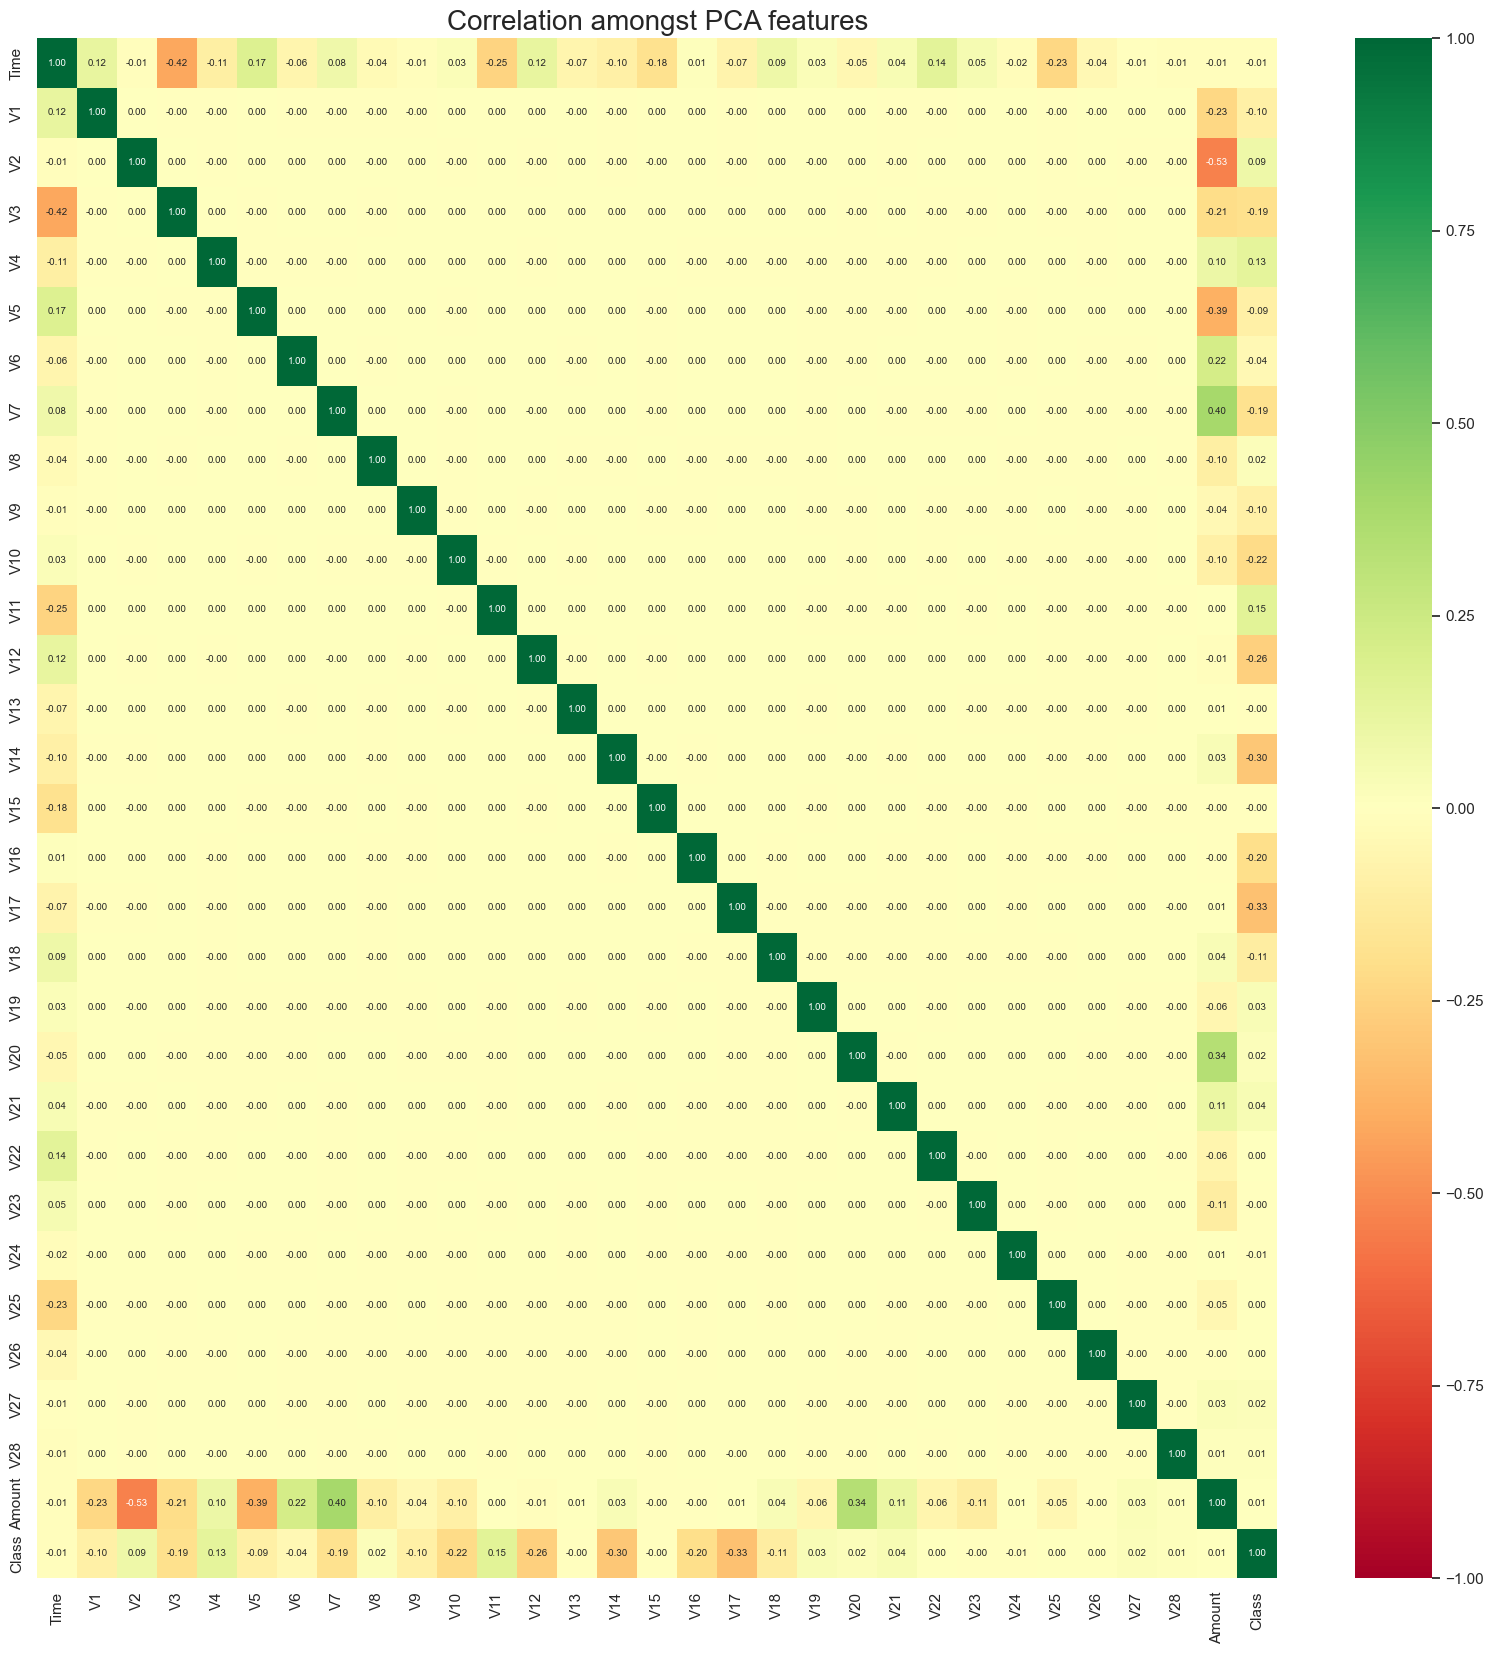

In [11]:

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1, fmt=".2f", annot_kws={"fontsize":7}) 
plt.title('Correlation amongst PCA features', fontsize=20) 
plt.show()

####  Class Imbalance - Class Distribution

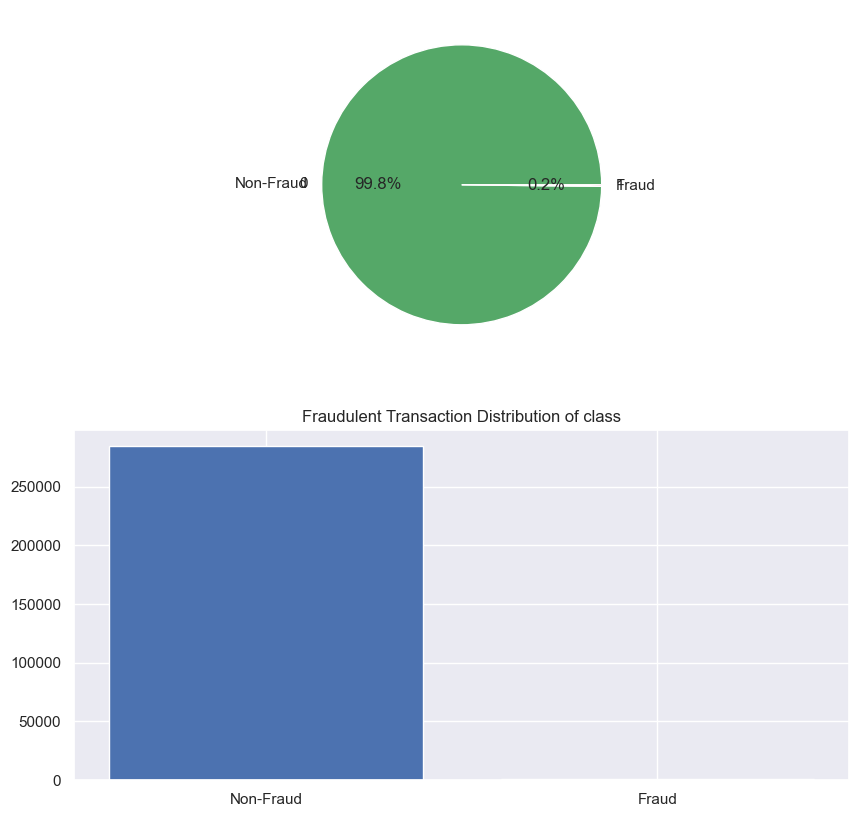

In [12]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 10))

#Draw a pie plot in the 0 axes and bar plot in second axes 

plt.subplot(2, 1, 1)
# draw pie chart showing % of the Class
plt.pie(df.groupby(by="Class").count()["Time"] / len(df), autopct='%1.1f%%', labels=["Non-Fraud", "Fraud"])

plt.pie(df.groupby(by="Class").count()["Time"], labels=df.groupby(by="Class").count()["Time"].index)
plt.subplot(2, 1, 2)
plt.bar(df.groupby(by="Class").count()["Time"].index, df.groupby(by="Class").count()["Time"])
#show label to the bar graph 
plt.xticks(np.arange(2), ['Non-Fraud', 'Fraud'])
plt.title("Fraudulent Transaction Distribution of class")



plt.show()

<Axes: xlabel='Class', ylabel='Amount'>

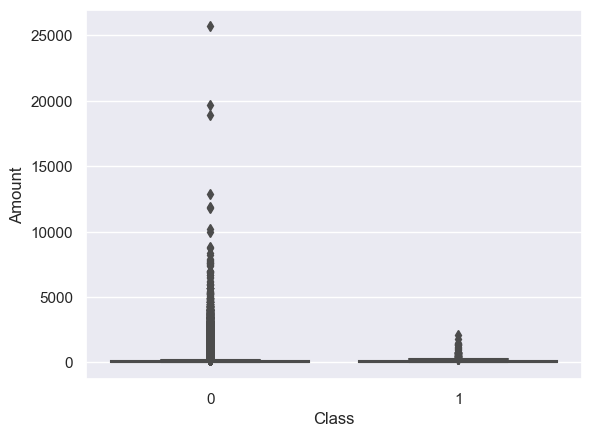

In [13]:
# Create a box plot for the Amount and give it by Class
sns.boxplot( data=df, x='Class', y='Amount')

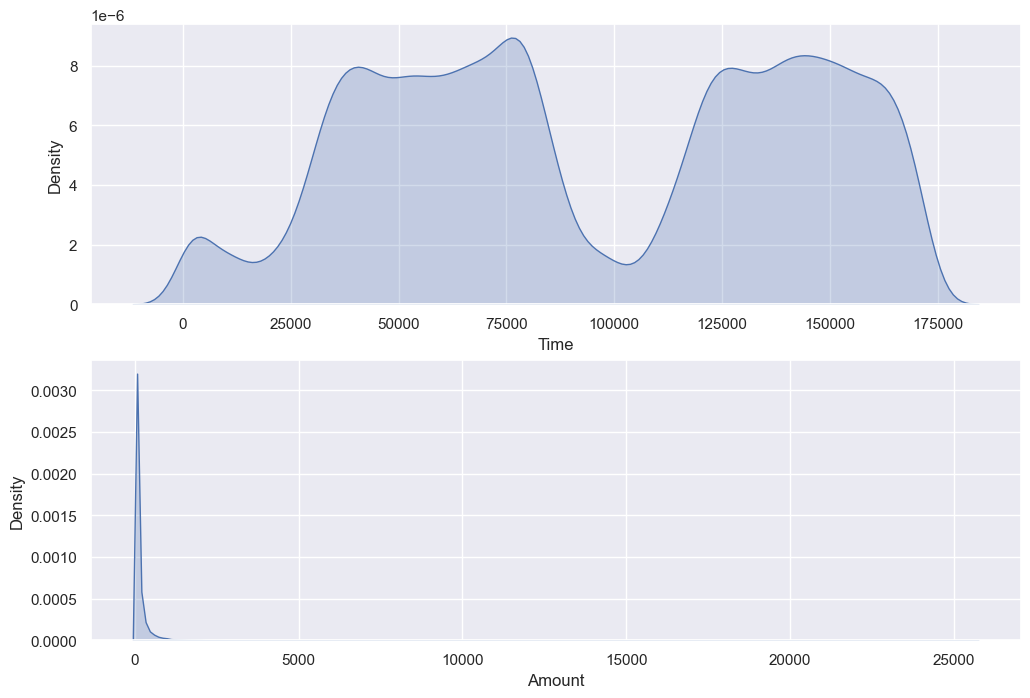

In [14]:
# Check distribution of Time and Amount 

plt.subplots(figsize=(12,8))

plt.subplot(2,1,1)
sns.kdeplot(df['Time'], shade=True)

plt.subplot(2,1,2)
sns.kdeplot(df['Amount'], shade=True)

plt.show()

# Preprocess Data - Bring Amount and Time to the similar scale 


In [15]:
# Apply scaling operation on the amount and time filed of the data.

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df["Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df["Time"] = scaler.fit_transform(df["Time"].values.reshape(-1, 1))

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.99,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,1.78,0
1,-0.99,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,-0.27,0
2,-0.99,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,4.98,0
3,-0.99,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,1.42,0
4,-0.99,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,0.67,0


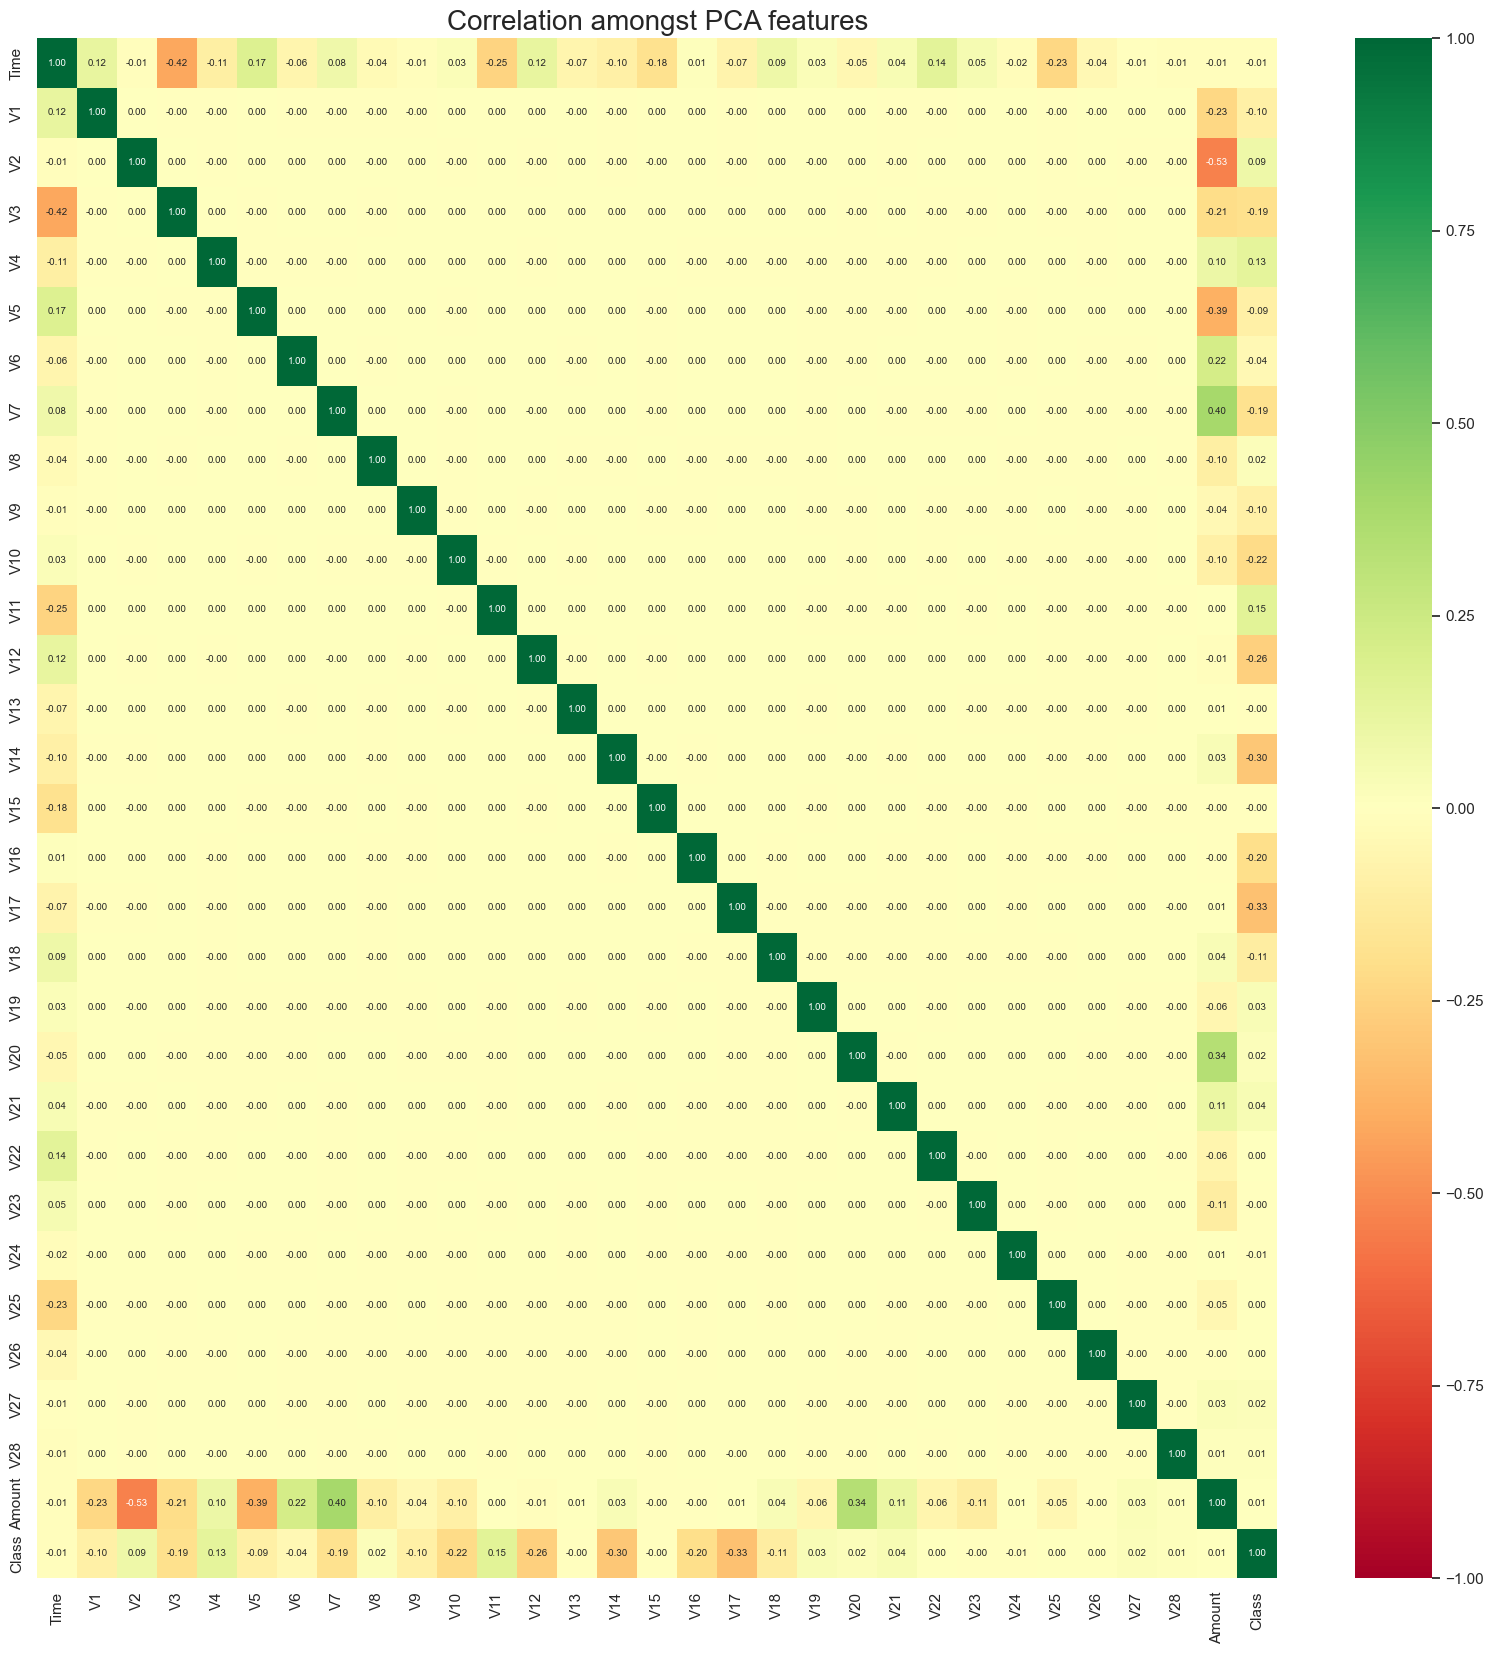

In [16]:

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1, fmt=".2f", annot_kws={"fontsize":7}) 
plt.title('Correlation amongst PCA features', fontsize=20) 
plt.show()

ANything to observe ?  Which featues are playing most important part in identification of fraud transaction
1. V1, V2, V3, V5  and Amount are negatively corelated 
2. V7, V20 and Amount are positively corelated 

1. V1, V3, V5, V7, V9 , V10, V12, V14, V17, V18 and Class are negatively corelated 
2. V4, V2, V11  and Class are positively corelated 

In [17]:
pos_corelation = ["V2", "V4", "V11", "V21"]
neg_corelation = ["V10", "V12", "V14", "V17", ]

In [18]:
# Draw Outlier plot for above 8 variables using subplots 
def plot_corelation(df, corelations):
    plt.figure(figsize=(20, 5))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    k = 0
    for i in range(1):
        for j in range(4):
            plt.subplot(1, 4, k+1)
            sns.boxplot(x="Class", y=corelations[k], data=df)
            plt.title(corelations[k])
            k += 1

    plt.show()


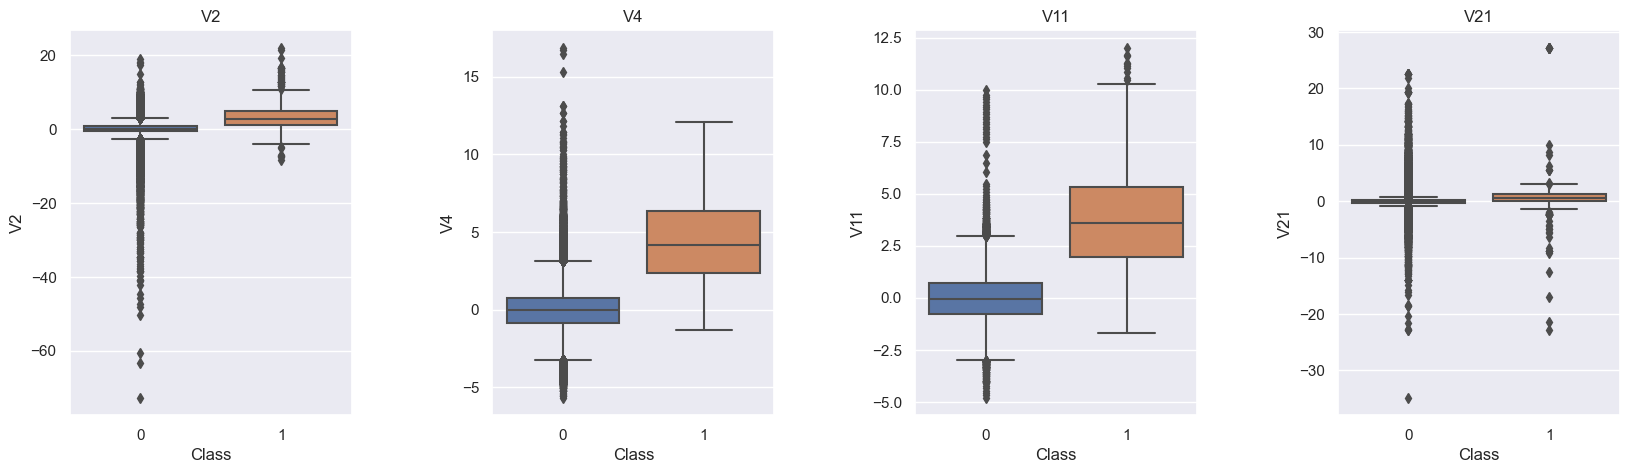

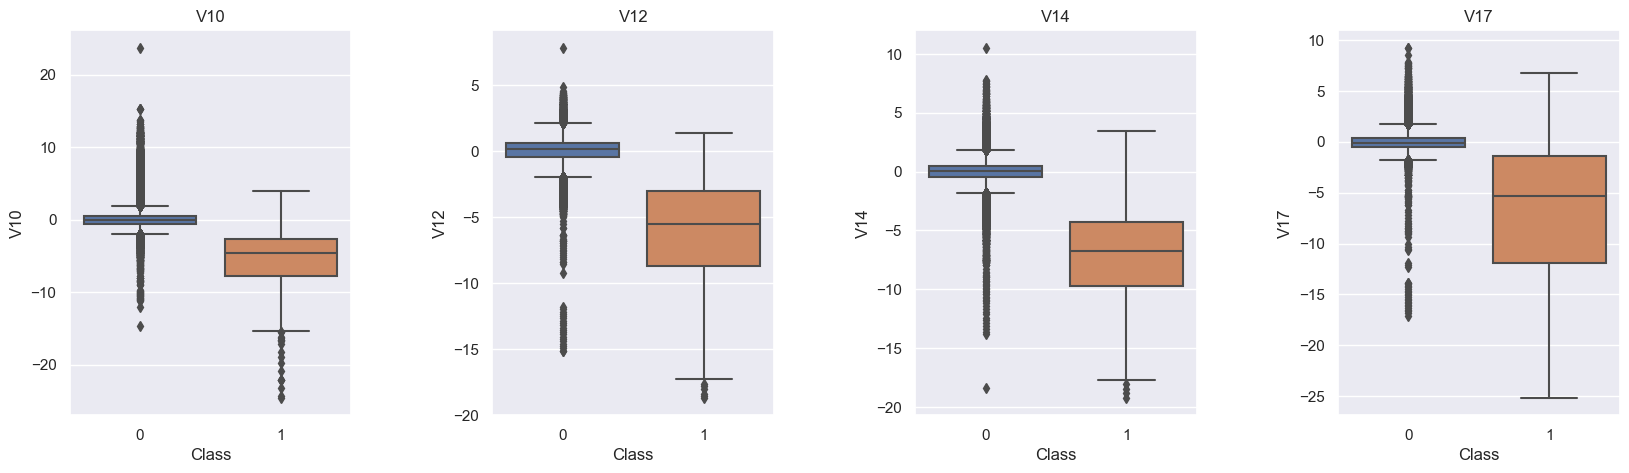

In [19]:
plot_corelation(df, pos_corelation)
plot_corelation(df, neg_corelation)

In [20]:
# function to cleanup the outliers based on the IQR range 
def delete_outliers(df, features):
    df_stats = []  # Initialize df_stats as an empty list
    for col in features:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df_stats.append({"col": col, "q1": q1, "q3": q3, "iqr": iqr, "lower_bound": lower_bound, "upper_bound": upper_bound})
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    df_stats = pd.DataFrame(df_stats)  # Convert df_stats to a DataFrame
    return df, df_stats

In [21]:
# concatenate pos_corelation and neg_corelation
import pandas as pd
features = pos_corelation + neg_corelation
features

['V2', 'V4', 'V11', 'V21', 'V10', 'V12', 'V14', 'V17']

In [22]:
df, stats = delete_outliers(df, features)
stats.head(10)

,col,q1,q3,iqr,lower_bound,upper_bound
0,V2,-0.60,0.80,1.40,-2.70,2.91
1,V4,-0.84,0.72,1.56,-3.19,3.07
2,V11,-0.74,0.75,1.49,-2.98,2.99
3,V21,-0.23,0.17,0.40,-0.83,0.77
4,V10,-0.52,0.34,0.86,-1.82,1.64
5,V12,-0.37,0.61,0.99,-1.85,2.09
6,V14,-0.44,0.41,0.85,-1.70,1.68
7,V17,-0.52,0.30,0.82,-1.74,1.52


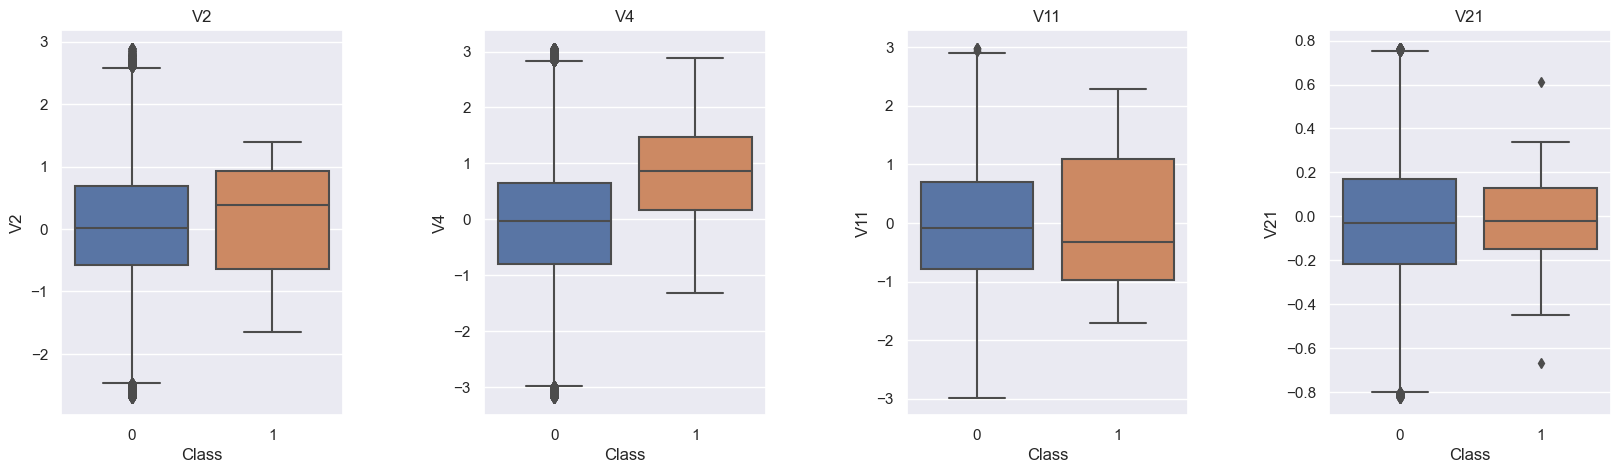

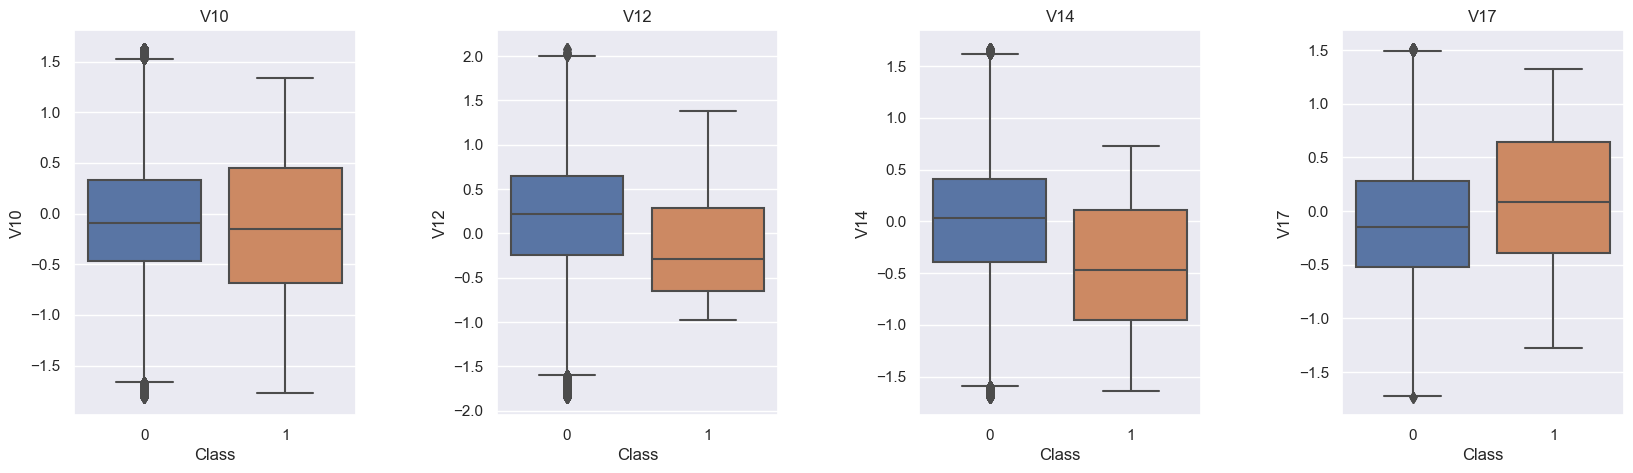

In [23]:
plot_corelation(df, pos_corelation)
plot_corelation(df, neg_corelation)

# Train - Test Split
#### 1. Stratified Sampling 
#### 2. Cross-Validation with Stratified Sampling 
#### 3. Repeated Random Sampling 



In [24]:
# Test Train Split of the Credit Card Fraud Detection Dataset using Stratified Sampling

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

def test_train_split_stratify(df):
    X = df.drop('Class', axis=1)
    y = df['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test


def test_train_split_stratify_cv(df, nsplits=5):
    # Step 1: Perform the initial train-test split with stratification
    X_train, X_test, y_train, y_test = test_train_split_stratify(df)

    # Step 2: Initialize StratifiedKFold for cross-validation
    stratified_cv = StratifiedKFold(n_splits=nsplits, shuffle=True, random_state=42)

    # Step 3: Iterate through the cross-validation folds and train your model
    for folds, (train_index, test_index) in enumerate(stratified_cv.split(X_train, y_train)):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]  
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train your model on X_train_fold and y_train_fold
    # Validate your model on X_val_fold and y_val_fold
    # Store the evaluation metrics for each fold (e.g., accuracy, precision, recall, etc.)

    # Step 4: After cross-validation, train your final model on the entire training set
    # using the best hyperparameters obtained during cross-validation

    # Step 5: Evaluate your final model on the test set (X_test and y_test)        

    return X_train_fold, X_val_fold, y_train_fold, y_val_fold, X_test, y_test



# Model Selection
## 1. Logistic Regression
## 2. Random Forest
## 3. KNN
## 4. Gradient Descent
## 5. Gradient Boosting
## 6. Isolation Forest 
## 7. SVM
## 8. Deep Learning Model


In [42]:
# Import all above models 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Define a dictionary of models and their names 


models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "Isolation Forest": IsolationForest()
    }


model_results = {
    "Logistic Regression": {},
    "Random Forest": {},
    "KNN": {},
    "SVM": {},
    "Decision Tree": {},
    "XGBoost": {},
    "Isolation Forest": {},
    }



In [ ]:
# Define the hyperparameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # You can adjust these values according to your preference
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [57]:
%time
# Use Stratified K Fold and run a regression model 
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score


import pandas as pd
from sklearn.model_selection import GridSearchCV
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

X = df.drop(['Class'], axis=1)
y = df['Class']

df_accuracy = pd.DataFrame(columns=['Model', 'accuracy', 'precision', 'recall', 'f1-score','roc-auc-score'])
accuracy_list = []  # Initialize df_stats as an empty list
for model_name, model in models.items():
    print(f"Running model {model_name}")
    if(isinstance(model, GridSearchCV)):
        model.fit(X, y)
        best_model = model.best_estimator_
        cross_val_predictions = cross_val_predict(best_model, X, y, cv=skf)
    else:
        cross_val_predictions = cross_val_predict(model, X, y, cv=skf)

    # accuracy_scores = cross_val_score(model, X, y, cv=skf, scoring="accuracy")

    
    precision = precision_score(y, cross_val_predictions)
    recall = recall_score(y, cross_val_predictions)
    f1 = f1_score(y, cross_val_predictions)
    accuracy = accuracy_score(y, cross_val_predictions)
    roc_auc = roc_auc_score(y, cross_val_predictions)

    accuracy_list.append({"Model" : model_name, 
                        "accuracy" : accuracy_scores.mean(), 
                        "precision" : precision,
                        "recall" : recall,
                        "f1-score" : f1,
                        "roc-auc-score" : roc_auc})
    

df_accuracy = pd.DataFrame(accuracy_list)

df_accuracy


CPU times: total: 0 ns
Wall time: 0 ns
Running model Logistic Regression
Running model Random Forest
Running model KNN
Running model SVM
Running model Decision Tree
Running model XGBoost
Running model Isolation Forest


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [51]:
undersampler = RandomUnderSampler()
accuracy_list = []  # Initialize df_stats as an empty list
for model_name, model in models.items():
    pipeline = Pipeline([ 
                        ('undersampler', undersampler),
                        ('model', model) 
                        ])
    accuracy_scores = cross_val_score(pipeline, X, y, cv=skf, scoring="accuracy")
    
    cross_val_predictions = cross_val_predict(pipeline, X, y, cv=skf)
    
    precision = precision_score(y, cross_val_predictions)
    recall = recall_score(y, cross_val_predictions)
    f1 = f1_score(y, cross_val_predictions)
    accuracy = accuracy_score(y, cross_val_predictions)
    roc_auc = roc_auc_score(y, cross_val_predictions)
    
    accuracy_list.append({"Model" : f"{model_name}-undersampler", 
                    "accuracy" : accuracy_scores.mean(), 
                    "precision" : precision,
                    "recall" : recall,
                    "f1-score" : f1,
                    "roc-auc-score" : roc_auc})



df_temp = pd.DataFrame(accuracy_list)

df_accuracy = pd.concat([df_accuracy, df_temp])


ModuleNotFoundError: No module named 'imblearn.under_samlping'

# Oversampling

In [ ]:
# Import SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

sm = SMOTE(sampling_strategy='majority', random_state=2)    # we can try with minority as well 


accuracy_list = []  # Initialize df_stats as an empty list
for model_name, model in models.items():
    pipeline = Pipeline([ 
                        ('oversampling', sm),
                        ('model', model) 
                        ])
    accuracy_scores = cross_val_score(pipeline, X, y, cv=skf, scoring="accuracy")
    cross_val_predictions = cross_val_predict(pipeline, X, y, cv=skf)
    precision = precision_score(y, cross_val_predictions)
    recall = recall_score(y, cross_val_predictions)
    f1 = f1_score(y, cross_val_predictions)
    accuracy = accuracy_score(y, cross_val_predictions)
    roc_auc = roc_auc_score(y, cross_val_predictions)

    accuracy_list.append({"Model" : f"{model_name}-oversampler", 
                    "accuracy" : accuracy_scores.mean(), 
                    "precision" : precision,
                    "recall" : recall,
                    "f1-score" : f1,
                    "roc-auc-score" : roc_auc})    
    


df_temp = pd.DataFrame(accuracy_list)

df_accuracy = pd.concat([df_accuracy, df_temp])


# Create an object of the class SMOTE

# Create a sample dataset


# Deep Learning Model   

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.losses as losses
import tensorflow.keras.metrics as metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from keras.layers import Dense
from sympy.abc import y
from sklearn.model_selection import cross_val_score
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

accuracy_list = []  # Initialize df_stats as an empty list

results = cross_val_score(model, X, y, cv=skf)
cross_val_predictions = cross_val_predict(model, X, y, cv=skf)

precision = precision_score(y, cross_val_predictions)
recall = recall_score(y, cross_val_predictions)
f1 = f1_score(y, cross_val_predictions)
accuracy = accuracy_score(y, cross_val_predictions)
roc_auc = roc_auc_score(y, cross_val_predictions)

accuracy_list.append({"Model" : "Neural Network", 
                "accuracy" : accuracy_scores.mean(), 
                "precision" : precision,
                "recall" : recall,
                "f1-score" : f1,
                "roc-auc-score" : roc_auc})    



df_temp = pd.DataFrame(accuracy_list)

df_accuracy = pd.concat([df_accuracy, df_temp])





# Evaluation

# Final Inference